In [5]:
#準備
!wget https://nlp100.github.io/data/neko.txt #ファイルダウンロード

--2021-10-03 09:58:31--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  --.-KB/s    in 0.007s  

2021-10-03 09:58:31 (127 MB/s) - ‘neko.txt.1’ saved [975789/975789]



In [6]:
!apt install mecab libmecab-dev mecab-ipadic-utf8 #Mecabインストール(少し時間かかる)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmecab-dev is already the newest version (0.996-5).
mecab is already the newest version (0.996-5).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!mecab -o ./neko.txt.mecab ./neko.txt #neko.txtを形態素解析した結果が、neko.txt.mecabとして出力 http://www.mwsoft.jp/programming/munou/mecab_command.html コマンドライン引数一覧

In [ ]:
# 行数の確認
!wc -l ./neko.txt.mecab

226266 ./neko.txt.mecab


In [ ]:
# 先頭15行の確認
print('表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音')
!head -15 ./neko.txt.mecab

表層形	品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


In [ ]:
#最後15行の確認
print('表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音')
!tail -15 ./neko.txt.mecab

表層形	品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
南無阿弥陀仏	名詞,一般,*,*,*,*,南無阿弥陀仏,ナムアミダブツ,ナムアミダブツ
南無阿弥陀仏	名詞,一般,*,*,*,*,南無阿弥陀仏,ナムアミダブツ,ナムアミダブツ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS


In [ ]:
#30
filename = './neko.txt.mecab'

sentences = []
morphs = []
for line in open(filename,mode='r'):  # 1行ずつ読込
  if line != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
    fields = line.split('\t') #入力文字がfields[0],形態素解析された結果がfields[1]に収容
    if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
      continue
    else:
      attr =  fields[1].split(',') #形態素解析された結果をattrに,ごとで分割
      morph = {'表層形(surface)': fields[0], '基本形(base)': attr[6], '品詞(pos)': attr[0], '品詞細分類1(pos1)': attr[1]} #基本形(原形)の出力はattr[6]にある。
      morphs.append(morph)
  else:  # 文末：形態素リストを文リストに追加
    sentences.append(morphs)
    morphs = [] #morphsをリセット

# 確認
for morph in sentences[2]: #3文目を形態素ごとに出力
  print(morph)

print(sentences[2]) #まとめて出力するとこうなる(形態素のリスト化を確認)

{'表層形(surface)': '\u3000', '基本形(base)': '\u3000', '品詞(pos)': '記号', '品詞細分類1(pos1)': '空白'}
{'表層形(surface)': '吾輩', '基本形(base)': '吾輩', '品詞(pos)': '名詞', '品詞細分類1(pos1)': '代名詞'}
{'表層形(surface)': 'は', '基本形(base)': 'は', '品詞(pos)': '助詞', '品詞細分類1(pos1)': '係助詞'}
{'表層形(surface)': '猫', '基本形(base)': '猫', '品詞(pos)': '名詞', '品詞細分類1(pos1)': '一般'}
{'表層形(surface)': 'で', '基本形(base)': 'だ', '品詞(pos)': '助動詞', '品詞細分類1(pos1)': '*'}
{'表層形(surface)': 'ある', '基本形(base)': 'ある', '品詞(pos)': '助動詞', '品詞細分類1(pos1)': '*'}
{'表層形(surface)': '。', '基本形(base)': '。', '品詞(pos)': '記号', '品詞細分類1(pos1)': '句点'}
[{'表層形(surface)': '\u3000', '基本形(base)': '\u3000', '品詞(pos)': '記号', '品詞細分類1(pos1)': '空白'}, {'表層形(surface)': '吾輩', '基本形(base)': '吾輩', '品詞(pos)': '名詞', '品詞細分類1(pos1)': '代名詞'}, {'表層形(surface)': 'は', '基本形(base)': 'は', '品詞(pos)': '助詞', '品詞細分類1(pos1)': '係助詞'}, {'表層形(surface)': '猫', '基本形(base)': '猫', '品詞(pos)': '名詞', '品詞細分類1(pos1)': '一般'}, {'表層形(surface)': 'で', '基本形(base)': 'だ', '品詞(pos)': '助動詞', '品詞細分類1(pos1)': '*'}, {'表層形(surface)':

In [ ]:
#31(重複した動詞は2度抜き出さないものとする、そのためset型を用いる。)
surf_verbs = set()
for sentence in sentences:
  for morph in sentence:
    if morph['品詞(pos)'] == '動詞':
      surf_verbs.add(morph['表層形(surface)'])

#確認
print(f'動詞の表層形の種類: {len(surf_verbs)}\n')
print('動詞の例')
for v in list(surf_verbs)[:30]:
  print(v)

動詞の表層形の種類: 3893

動詞の例
変ら
気がつい
悩み
述べよ
まつわっ
坐る
着く
なさい
もっ
笑っ
扱き
折れる
可愛がら
覗く
適し
行っ
つけよ
ずれ
まわる
相成
明か
制する
泳ぐ
利かし
怖がっ
合う
明い
勤まっ
損ね
いろ


In [ ]:
#32(重複した動詞は2度抜き出さないものとする、そのためset型を用いる。)
base_verbs = set()
for sentence in sentences:
  for morph in sentence:
    if morph['品詞(pos)'] == '動詞':
      base_verbs.add(morph['基本形(base)'])

#確認
print(f'動詞の基本形の種類: {len(base_verbs)}\n')
print('動詞の例')
for v in list(base_verbs)[:30]:
  print(v)

動詞の基本形の種類: 2300

動詞の例
掻い込む
預る
済ませる
濁る
坐る
浴びせる
着く
溯る
春めく
折れる
殖える
聞き合わせる
泊る
差す
覗く
もうす
角張る
勝れる
まわる
制する
突き出す
泳ぐ
蘇る
らっしゃる
結び付ける
合う
なく
届く
講じる
着せる


In [ ]:
#33 (名詞+の+名詞を抽出すればよい)
ans = set()
for sentence in sentences:
  for i in range(1, len(sentence) - 1):
    if sentence[i - 1]['品詞(pos)'] == '名詞' and sentence[i]['表層形(surface)'] == 'の' and sentence[i + 1]['品詞(pos)'] == '名詞':
      ans.add(sentence[i - 1]['表層形(surface)'] + sentence[i]['表層形(surface)'] + sentence[i + 1]['表層形(surface)'])

# 確認
print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
print('例')
for n in list(ans)[:30]:
  print(n)

「名詞+の+名詞」の種類: 4924

例
明治の社会
鰹節の出処
あなたのため
現象の説明
前足の運動
家の利益
自覚の一助
開明の時節
闘の壮観
世界の青年
彼等の社会
例の金
演舌の真似
三の剣突
僥倖の仕合せ
葉のよう
理詰の虚言
これしきの事
馬琴の胴
最後の方案
全体の感じ
袋戸の腸
感謝の微衷
人間の自ら
十の時
下手の裁縫
連勝の勢
君の作
居士の墓
全体の重量


In [ ]:
#34
ans = set()
for sentence in sentences:
  nouns = '' #名詞の連結したものを文字列型で定義
  num = 0 #名詞の連結数をカウント(2以上で出力)
  for morph in sentence:
    if morph['品詞(pos)'] == '名詞':  #最初の形態素から順に、名詞であればnounsに連結し、連結数(num)をカウント
      nouns = ''.join([nouns, morph['表層形(surface)']]) #名詞を連結
      num += 1 #名詞カウントを1増やす
    elif num >= 2:  #名詞以外、かつここまでの連結数が2以上の場合は出力し、nounsとnumを初期化
      ans.add(nouns)
      nouns = ''
      num = 0
    else:  #名詞が2つ以上連結されていない場合、nounsとnumを初期化
      nouns = ''
      num = 0
 


# 確認
print(f'連接名詞の種類: {len(ans)}\n')
print('例')
for n in list(ans)[:30]:
  print(n)

連接名詞の種類: 4454

例
素町人
超然主義
三女子
万事あれ
幕無し
六十二回
露西亜兵
結婚後新た
理論上
正科
二巻
散々価
運動律
さっき座敷
書生体
間身
二時頃
享受者
んざあ苦
侍従官女
その間休養
二丁目
毎日相
八十
二時十分前
西洋婦人
十人十色
術師流
幾皿
希臘人


In [ ]:
#35
from collections import defaultdict #defaultdictについて https://qiita.com/xza/items/72a1b07fcf64d1f4bdb7

ans = defaultdict(int) #初期値0として辞書を作成
for sentence in sentences:
  for morph in sentence:
    ans[morph['基本形(base)']] += 1  # 単語数の更新、2度目以降の登場なら1増やす(初登場の単語であれば1をセット)

ans = sorted(ans.items(), key=lambda x: x[1], reverse=True) #数値の大きい順に辞書をソート

# 確認
for w in ans[:30]:
  print(w)

('の', 9194)
('。', 7486)
('て', 6848)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)
('「', 3231)
('」', 3225)
('ない', 3052)
('も', 2479)
('ある', 2320)
('*\n', 2191)
('で', 2084)
('から', 2031)
('いる', 1777)
('ん', 1568)
('か', 1529)
('云う', 1408)
('事', 1207)
('です', 1164)
('ます', 1146)
('なる', 1120)
('へ', 1034)
('う', 987)


In [ ]:
#36(準備)
!pip install japanize_matplotlib #日本語版matplotlibインストール

     |████████████████████████████████| 4.1 MB 1.7 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=057aaf51e1c245c7b718a37fd3356f56a3c160f81dbbb6a61a03da7cdc4e826c
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


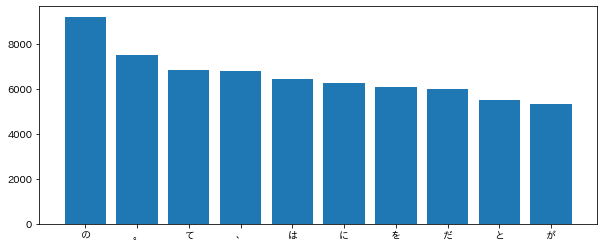

In [ ]:
#36
import matplotlib.pyplot as plt #matplotlibについて https://note.nkmk.me/python-matplotlib-basic/ pyplot.plotと入力するのは面倒なのでplt.plotなどと入力できるように定義(一般的)
import japanize_matplotlib

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    ans[morph['基本形(base)']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(10, 4)) #figure:絵画領域の大きさ https://www.yutaka-note.com/entry/matplotlib_figure#Matplotlib%E3%81%AE%E6%8F%8F%E7%94%BB%E9%A0%98%E5%9F%9FFigure%E3%81%A8%E5%BA%A7%E6%A8%99%E8%BB%B8Axes
plt.bar(keys, values) #棒グラフ(x,y),xが横,yが縦
plt.show()

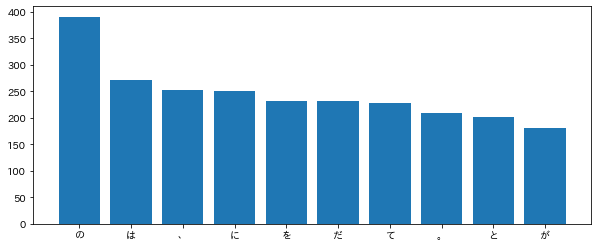

In [ ]:
#37
ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['表層形(surface)'] for morph in sentence]:  # 文章の形態素に「猫」が含まれる場合のみ辞書に追加
    for morph in sentence:
       ans[morph['基本形(base)']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
del ans['猫'] #猫とよく共起する単語の中に猫が含まれてしまうためdelを使い削除
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True) 

keys = [a[0] for a in ans[0:10]] #以下#36と同じ
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(10, 4))
plt.bar(keys, values)
plt.show()

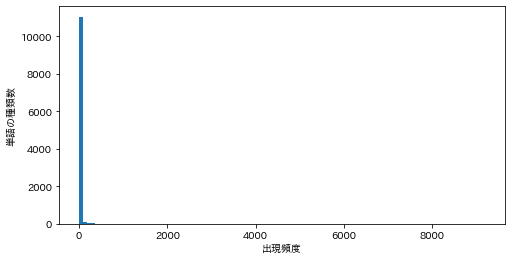

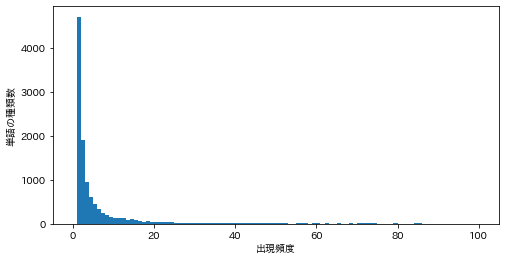

In [ ]:
#38
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    ans[morph['基本形(base)']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100) #ヒストグラム https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show() #これだと分かりにくかったので、出現頻度の低い方を拡大する。

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100, range=(0,100)) #ヒストグラム https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show() #確認するとlogっぽいので#39で本当にそうなのか確認する。

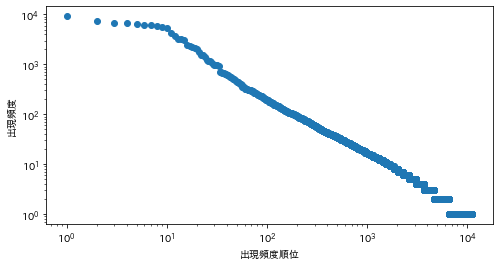

In [ ]:
#39 ジップの法則 https://ja.wikipedia.org/wiki/%E3%82%B8%E3%83%83%E3%83%97%E3%81%AE%E6%B3%95%E5%89%87
import math

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    ans[morph['基本形(base)']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))] #対数だと横軸に0を定義できないため、1から順番にans個の目盛りで横軸を作成する
values = [a[1] for a in ans] #ansのvalueを配列に割り振る
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values) #散布図 https://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3
plt.xscale('log') #対数に変換する
plt.yscale('log') #対数に変換する
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()